In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df_sra=pd.read_csv('sra_complete_runs.csv',low_memory=False)

In [53]:
df_sra['ReleaseDate'] = df_sra['ReleaseDate'].apply(lambda x : pd.to_datetime(str(x)))
df_sra['year'] = df_sra['ReleaseDate'].dt.year

In [62]:
df_sra.tail()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash,year
7676058,SRR049674,2010-05-27 09:26:35,2014-05-27 02:57:13,35888370,1794418500,0,50,1504,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NIAID-RML-RTS,SRA017695,NaN,public,1C9EE0CEFAE2352A0321B24EAB64EE18,753ED95CDA0B112FD877F38960613605,2010.0
7676059,SRR049675,2010-05-27 09:26:35,2014-05-27 02:58:17,40264881,2013244050,0,50,1696,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NIAID-RML-RTS,SRA017695,NaN,public,9F96F35BE762574A084985FD9C918C28,392587111A738BC44AE8878E649D052A,2010.0
7676060,SRR049677,2010-05-27 09:26:35,2014-05-27 02:58:58,40852259,2042612950,0,50,1732,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NIAID-RML-RTS,SRA017695,NaN,public,22DCD0A93DAA207187EF6C6F6A835A55,416EBCA2B1A6AB70E4F778F16C36FCE5,2010.0
7676061,SRR042496,2010-05-11 15:16:41,2012-01-19 16:52:13,47760,16505980,0,345,42,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,SAN DIEGO STATE UNIVERSITY,SRA012164,NaN,public,633E95BCDFC18AD9C8B5DEAAFAE4DD3F,00AB1B11657DAE26FFECDAD623148A3C,2010.0
7676062,SRR043092,2010-05-10 17:56:13,2012-01-19 16:52:35,162876,43696870,0,268,80,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,UNIVERSITY OF PENNSYLVANIA,SRA012580,NaN,public,1D70AED9981C7955082992A1AA787246,7C03FE9A87DE427C72136E8C1CA1781C,2010.0


In [55]:
df_sra_techniques = df_sra.groupby('year')['LibraryStrategy'].value_counts().reset_index(name='count')
print(df_sra_techniques)

       year      LibraryStrategy  count
0    2007.0                  WGS    234
1    2008.0                  WGS   5043
2    2008.0             ChIP-Seq    221
3    2008.0                  WXS    158
4    2008.0                  EST    124
..      ...                  ...    ...
315  2019.0            FAIRE-seq    146
316  2019.0  Synthetic-Long-Read    141
317  2019.0                 ChIP    105
318  2019.0              MRE-Seq     66
319  2019.0            FINISHING      3

[320 rows x 3 columns]


In [56]:
df_sra_techniques_max = df_sra.groupby("year").max()["LibraryStrategy"]
print (df_sra_techniques_max)

year
2007.0          WGS
2008.0          WXS
2009.0          WXS
2010.0          WXS
2011.0          WXS
2012.0    miRNA-Seq
2013.0    ncRNA-Seq
2014.0        other
2015.0    ncRNA-Seq
2016.0        other
2017.0        other
2018.0        other
2019.0        other
Name: LibraryStrategy, dtype: object


In [57]:
#df_sra_techniques.groupby(['year', 'LibraryStrategy']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

In [58]:
#df_sra_techniques.pivot("year","LibraryStrategy").plot(kind="bar",stacked=True)

In [59]:
#df1=df_sra_techniques.pivot("year","LibraryStrategy")
#df1.head()

count                                                 \
LibraryStrategy AMPLICON ATAC-seq Bisulfite-Seq CLONE CLONEEND ChIP-Seq   
year                                                                      
2012.0               NaN      NaN           NaN   NaN      NaN      NaN   
2016.0               NaN      NaN           NaN   NaN      NaN      NaN   
2017.0               1.0      NaN           NaN   NaN      NaN      NaN   
2018.0              16.0      NaN           NaN   NaN      NaN      7.0   
2019.0           17343.0   2427.0         100.0  78.0    747.0   1900.0   

                                                                ...          \
LibraryStrategy DNase-Hypersensitivity FAIRE-seq  Hi-C MBD-Seq  ... RAD-Seq   
year                                                            ...           
2012.0                             NaN       NaN   NaN     NaN  ...     NaN   
2016.0                             NaN       NaN   NaN     NaN  ...     NaN   
2017.0                             NaN       NaN   NaN     NaN  ...     NaN   
2018.0                             NaN       NaN   NaN     NaN  ...     NaN   
2019.0                           333.0       2.0  95.0    85.0  ...  7427.0   

                                                                     \
LibraryStrategy RNA-Seq Synthetic-Long-Read Targeted-Capture Tn-Seq   
year                                                                  
2012.0              NaN                 NaN              NaN    NaN   
2016.0              NaN                 NaN              NaN    NaN   
2017.0              NaN                 NaN              NaN    NaN   
2018.0              NaN                 NaN              2.0    NaN   
2019.0            428.0                26.0           2289.0  169.0   

                                                           
LibraryStrategy VALIDATION    WCS    WGA      WGS     WXS  
year                                                       
2012.0                 NaN    NaN    NaN      4.0     NaN  
2016.0                 NaN    NaN    NaN      1.0     NaN  
2017.0                 NaN    NaN    1.0      5.0     NaN  
2018.0                12.0    NaN    NaN    340.0     NaN  
2019.0                 NaN  190.0  645.0  57224.0  2042.0  

[5 rows x 24 columns]

In [60]:
df_sra_techniques = df_sra.groupby('LibraryStrategy')['Run'].count().reset_index(name='count')
df_sra_techniques.head()

,LibraryStrategy,count
0,AMPLICON,1733023
1,ATAC-seq,43444
2,Bisulfite-Seq,67374
3,CLONE,139340
4,CLONEEND,2095


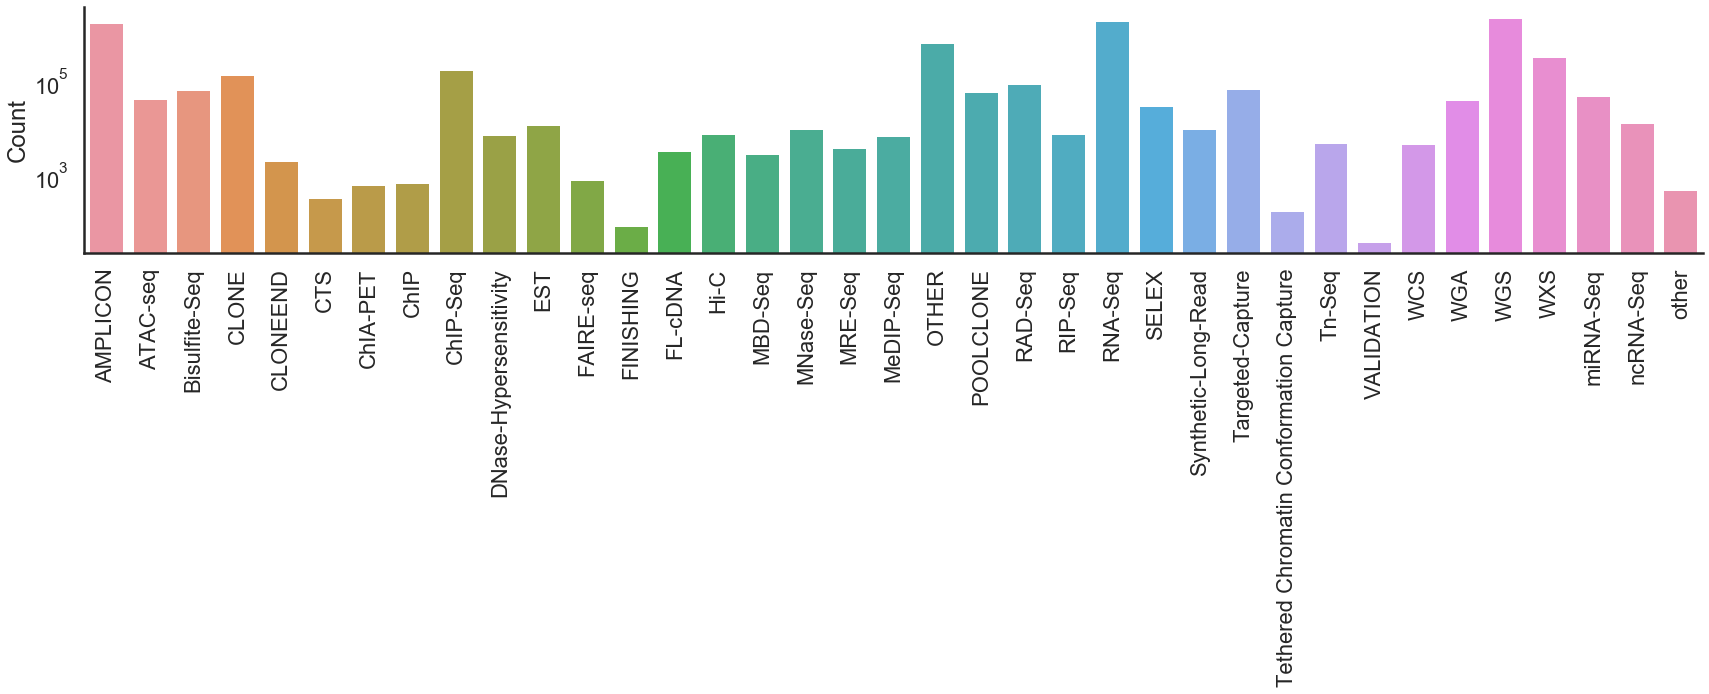

In [65]:
import matplotlib.pyplot as plt 
import seaborn as sns
g=sns.set_style("white") 
g=sns.set_context("poster")
g=sns.catplot(x='LibraryStrategy',y='count',data=df_sra_techniques,kind='bar',aspect=5)
g.set_xticklabels(rotation=90) 
g.set(xlabel='', ylabel='Count')
g.set(yscale="log")
g=sns.despine() #plt.show(g)
plt.savefig("precision_length.png",bbox_inches="tight")
plt.savefig(".precision_length.pdf",bbox_inches="tight")